In [0]:
import torch
from torch.nn import Linear
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Modelo simple

In [0]:
torch.manual_seed(42)

#Si se tiene 1 feature de entrada y 1 de salida
# entonces el modelo debería ser algo como y = w*x + b
model = Linear(in_features=1, out_features=1)
#El modelo empieza con sus parámetros inicializados aleatoriamente.
print("b: ", model.bias)
print("w: ", model.weight)

b:  Parameter containing:
tensor([0.8300], requires_grad=True)
w:  Parameter containing:
tensor([[0.7645]], requires_grad=True)


In [0]:
x = torch.tensor([3.0])
print(model(x))

tensor([3.1236], grad_fn=<AddBackward0>)


# Creación del dataset


Text(0, 0.5, 'y')

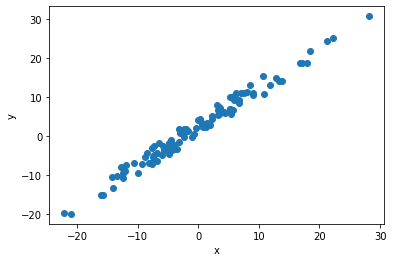

In [0]:
#X - 100,1 elementos 
X = torch.randn(100, 1)*10
y = X + 5*torch.rand(100,1)

#Graáfica simple
plt.plot(X,y, 'o')
plt.xlabel('x')
plt.ylabel('y')


# Modelo avanzado




In [0]:
class LR(nn.Module):

  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    return self.linear(x)


In [0]:
torch.manual_seed(42)
model = LR(1,1)

In [0]:
#Imprimir en pantalla los parámetros iniciales
def get_params():
  [w, b ]  = model.parameters()
  return (w[0][0].item() , b[0].item())

print(get_paramenters())

(0.7645385265350342, 0.8300079107284546)


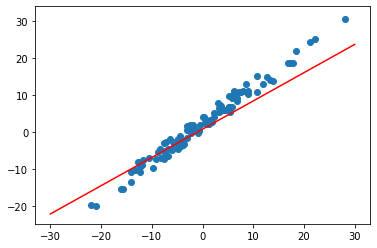

In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 =  get_params()
  x1 = np.array([-30,30])
  y1 = w1*x1 + b1
  plt.plot(x1,y1,'r')
  plt.scatter(X,y)
  plt.show()

plot_fit("Modelo inicial")

In [0]:
#El criterio es lo que se quiere minimizar,
#En este caso es la función Mean Squared Error.
#MSE calcula el error cuadrático medio entre los puntos reales y la aproximación
criterion = nn.MSELoss()
#El optimizador es "la forma" en la que se va a lograr esa meta de minimización
#SGD es el descenso estocástico del gradiente, la función básica para lograrlo.
#Al optimizador se le pasa la estructura total de los parámetros que se van
# a optimizar paso a paso, 
#Cuando lleguemos a Style Transfer veremos que se le pasa una imagen, por ejemplo.
optimizer = torch.optim.SGD(model.parameters(), lr=0.01 )

In [0]:
#100 veces vamos a pasar los datos por el optimizador
epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print('epoch: ' , i)
  print('loss: ', loss.item())
  
  #Vamos guardando las pérdidas para graficar más adelante
  losses.append(loss)
  
  #reiniciamos en cada iteración para que no se acumulen los gradientes
  optimizer.zero_grad()
  
  #Calling .backward() mutiple times accumulates the gradient (by addition)
  #for each parameter. This is why you should call optimizer.zero_grad() 
  #after each .step() call. Note that following the first .backward call,
  #a second call is only possible after you have performed another forward pass.
  #O sea, calculamos el gradiente de la función para saber 
  #¿Hacia qué dirección está creciendo la pérdida?
  # luego, agarramos para el otro lado.
  loss.backward()
  
  #optimizer.step is performs a parameter update based on the current gradient
  #(stored in .grad attribute of a parameter) and the update rule. 
  #As an example, the update rule for SGD is defined here:
  #https://github.com/pytorch/pytorch/blob/cd9b27231b51633e76e28b6a34002ab83b0660fc/torch/optim/sgd.py#L63
  # O sea, step() actualiza los parámetros del modelo en la dirección contraria
  # al gradiente (Porque estamos minimizando la pérdida) 
  optimizer.step()




epoch:  0
loss:  1.8916646242141724
epoch:  1
loss:  1.8915148973464966
epoch:  2
loss:  1.8913708925247192
epoch:  3
loss:  1.8912330865859985
epoch:  4
loss:  1.8911004066467285
epoch:  5
loss:  1.8909727334976196
epoch:  6
loss:  1.89085054397583
epoch:  7
loss:  1.890732765197754
epoch:  8
loss:  1.8906199932098389
epoch:  9
loss:  1.8905117511749268
epoch:  10
loss:  1.8904075622558594
epoch:  11
loss:  1.8903076648712158
epoch:  12
loss:  1.890211820602417
epoch:  13
loss:  1.8901194334030151
epoch:  14
loss:  1.8900306224822998
epoch:  15
loss:  1.8899458646774292
epoch:  16
loss:  1.889864206314087
epoch:  17
loss:  1.8897857666015625
epoch:  18
loss:  1.8897099494934082
epoch:  19
loss:  1.8896379470825195
epoch:  20
loss:  1.8895683288574219
epoch:  21
loss:  1.889501690864563
epoch:  22
loss:  1.8894376754760742
epoch:  23
loss:  1.8893758058547974
epoch:  24
loss:  1.8893166780471802
epoch:  25
loss:  1.8892604112625122
epoch:  26
loss:  1.8892054557800293
epoch:  27
loss: 

Text(0.5, 0, 'Epoch')

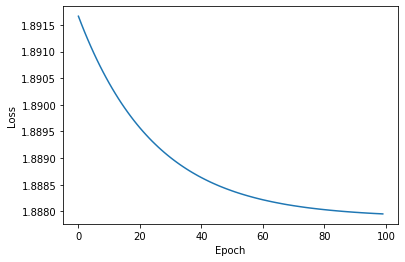

In [0]:
#Graficamos la pérdida loss a medida que avanzan las épocas.
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

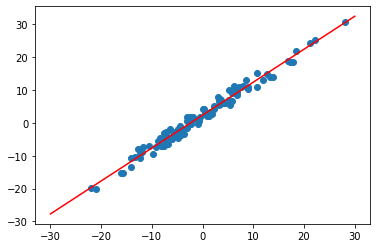

In [0]:
plot_fit("Trained model")